# How to use it

pyEdgeworthBox provides with a tool to plot the [Edgeworth box](https://en.wikipedia.org/wiki/Edgeworth_box) and calculate equilibrium, core, pareto effective allocation etc in the pure exchange economy. These are studied in the microeconomics courses. A pure exchange economy consists of 2 consumers and 2 goods. Each consumer has her own preferences represented by a utility function and provided with some initial endowment of 2 goods (wich, however, could be 0). 

The main class is EdgeBox where you need to put the utilities of each consumer and their initial endowments. Consider an economy where the first consumer has a utility function $u(x,y)=x^{0.6}*y^{0.4}$ and the bundles of goods A and B (10,20), i.e. she prefers the good A over B. The second consumer has a utility function $u(x,y)=x^{0.1}*y^{0.9}$ and the bundles of goods A and B (20,10), i.e. he prefers the good B over A.

This example can be calculated like this:

In [6]:
#!pip install pyEdgeworthBox
%matplotlib inline

In [7]:
import pyEdgeworthBox as eb

In [8]:
EB=eb.EdgeBox(
    u1 = lambda x,y: x**0.6*y**0.4    # utility function of the 1st participant
    , u2 = lambda x,y: x**0.1*y**0.9  # utility function of the 2nd participant
    , IE1 = [4,10]                   # initial endowment of the 1st participant
    , IE2 = [6,10]                   # initial endowment of the 2nd participant
)

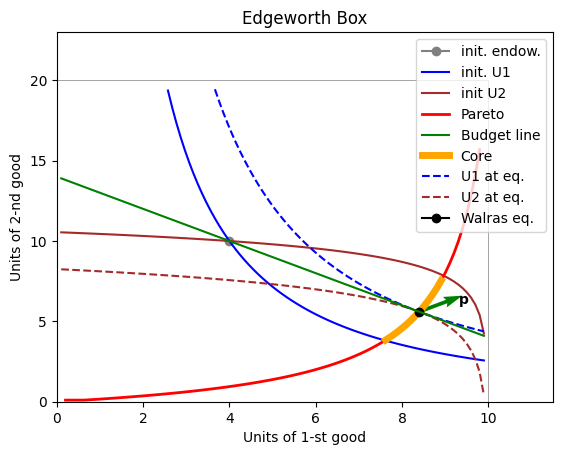

In [9]:
EB.plot() # plot everything

One can customize the plot specifying in the 'graphs' argument the list of plots. These plots are available: 'utility', 'pareto', 'budget', 'core', 'eq'. By default everything is plotted.

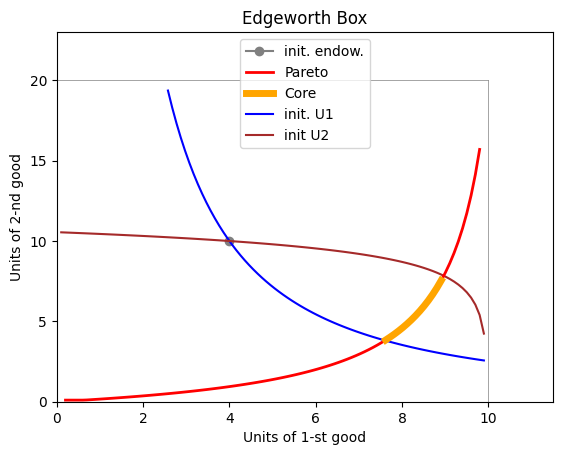

In [10]:
# plot the contract curve ('pareto'), the core ('core'), and the utilities at the initial endowment ('utility')
# (i.e. core is the part of the contract curve which is at least as good as no trade at all)
EB.plot(graphs=['pareto', 'core', 'utility'])

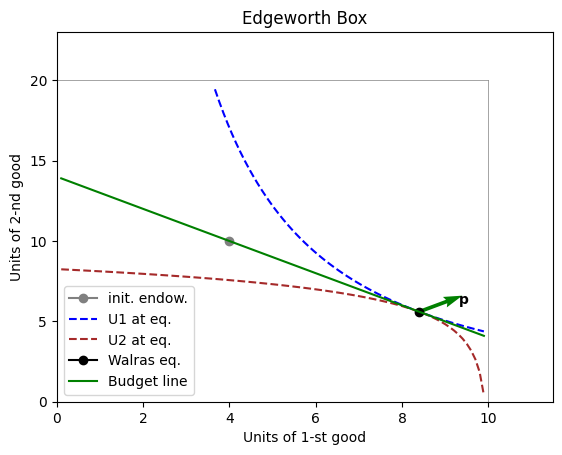

In [11]:
# plot the equilibrium ('eq') that is the distribution after trade and the utilities at equilibrium as well 
# plot as well the budget constraint ('budget')
# (the price vector is normalized to be 1 for the 2nd product)
EB.plot(graphs=['eq', 'budget'])

## Customization

It's possible to add custom plots.
First, using the function 'set_points_for_plot' one generates with a given function under a certain attribute a set of points.
Then, one plots using this added attribute.
To start with a simple example, let's add a diagonal.

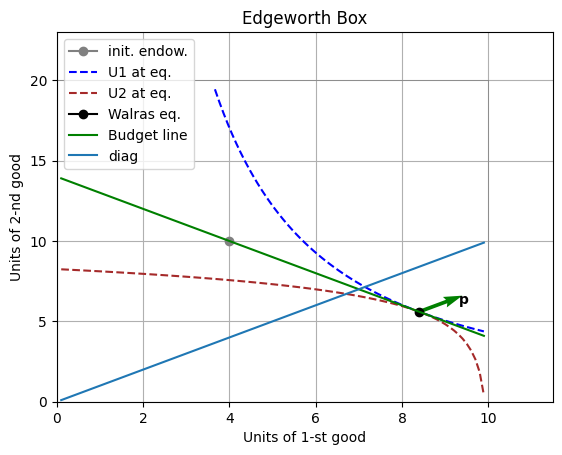

In [51]:
EB.set_points_for_plot('diag', lambda x: x)
EB.plot(graphs=['eq', 'budget', 'diag'])

Another example, add another budget line which is not based on the equilibrium price.

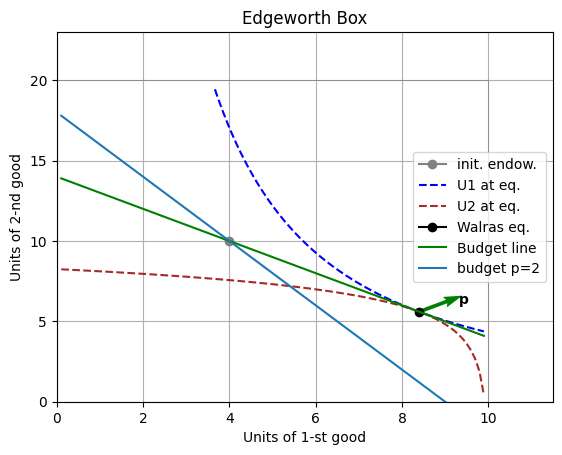

In [55]:
# generate the budget constraint equation with a price p=2
EB.calc_budget(price=2)
# generate points for such a plot:
EB.set_points_for_plot('budget p=2', lambda x: EB.Bp(x))
# reset the budget constraint for the equilibrium price:
EB.calc_budget(EB.p)
EB.plot(graphs=['eq', 'budget', 'budget p=2'])

Another example of the Edgeworth box with a different utility functions and initial allocations.

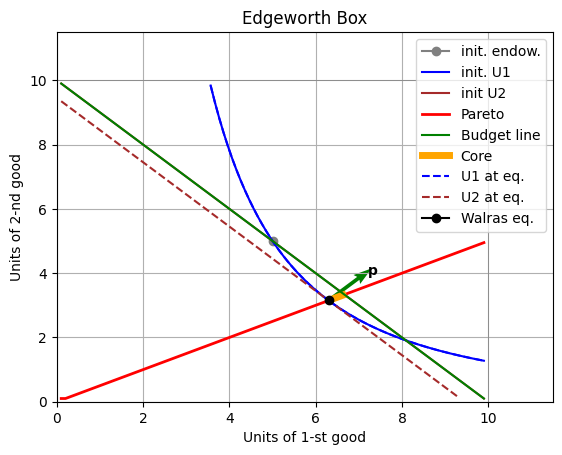

In [56]:
EB2=eb.EdgeBox(u1 =lambda x,y: x**2*y
               , u2=lambda x,y: x+y
               , IE1=[5,5]
               , IE2=[5,5])
EB2.plot()

# Input arguments

**u1** - utility function of the 1st participant

**u2** - utility function of the 2nd participant

**IE1** - initial endowment of the 1st participant (of the good X and good Y)

**IE2** - the same for the 2nd participant

This means that the preferences and endowments are enough to determine the rest (prices, equilibrium etc).

# Solution concepts

The object of the class *EdgeBox* contains the following properties that correspond to certain concepts of microeconomics/game theory.

Some of them are a point or a set of points, and some are functions.

## Set of points

The following concepts are set of points used to draw the line, i.e. they might not contain all possible solutions (e.g. usually the case for the contract curve), however, some might (e.g. the equilibrium).

**CORE** - [Core](https://en.wikipedia.org/wiki/Core_(game_theory))

**PARETO** - [Contract curve](https://en.wikipedia.org/wiki/Contract_curve), or efficient frontier or the set of Pareto efficient points

**EQ1** - [Competitive (Walrasian) equilibrium](https://en.wikipedia.org/wiki/Competitive_equilibrium) solution of the 1st participant

**EQ2** - the same for the 2nd participant

**BUDGET** - Budget line.

**p** - price at equilibrium point.

**p_weighted** - normalized (i.e. s.t. the sum of its components is 1) price at equilibrium point.

The relation between the concepts is the folloiwng: EQ is in CORE is in PARETO.

Note that they don't contain all possible points only some of them.

## Functional forms

The properties below are in the functional form, i.e. you need to provide with the input argument(s).

**MRS1** - [Marginal rate of substitution](https://en.wikipedia.org/wiki/Marginal_rate_of_substitution) of the 1st participant. 

**MRS2** - the same for the 2nd participant.

**Bp** - budget line.

**_pareto** - Pareto solutions.

# Caution

The computation is implemented only for the interior solutions! For "bad" functions solutions could deviate or not be achieved at all. Also doesn't work if both of participants have linear functions.

# Install

*pip install pyEdgeworthBox*